In [1]:
!pip install pymysql

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TkAgg")
import zipfile
import cv2 #pip install opencv-python
from skimage import io #scikit-image,scikit-learn
from skimage import transform
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
import pymysql
from tkinter import *
import tkinter.filedialog
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from PIL import Image

%matplotlib inline

In [2]:
brain_df = pd.read_csv('data_mask.csv')

In [3]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [4]:
brain_df.head(50)

patient_id                                         image_path  \
0   TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1   TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2   TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3   TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4   TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
5   TCGA_CS_5395_19981004  TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif   
6   TCGA_CS_5395_19981004  TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif   
7   TCGA_CS_5395_19981004  TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif   
8   TCGA_CS_5395_19981004  TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif   
9   TCGA_CS_5395_19981004  TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif   
10  TCGA_CS_5395_19981004  TCGA_CS_6669_20020102/TCGA_CS_6669_20020102_1.tif   
11  TCGA_CS_5395_19981004  TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_1.tif   
12  TCGA_CS_5395_19981004  TCGA_DU_5851_19950428/TCGA_DU_5851_19950428_1.tif   
13  TCGA_CS_5395_19981004  TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_1.tif   
14  TCGA_CS_5395_19981004  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_1.tif   
15  TCGA_CS_5395_19981004  TCGA_DU_5849_19950405/TCGA_DU_5849_19950405_1.tif   
16  TCGA_CS_5395_19981004  TCGA_CS_6290_20000917/TCGA_CS_6290_20000917_1.tif   
17  TCGA_CS_5395_19981004  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_1.tif   
18  TCGA_CS_5395_19981004  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_1.tif   
19  TCGA_CS_5395_19981004  TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1.tif   
20  TCGA_CS_4944_20010208  TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_1.tif   
21  TCGA_CS_4944_20010208  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_1.tif   
22  TCGA_CS_4944_20010208  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_1.tif   
23  TCGA_CS_4944_20010208  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1.tif   
24  TCGA_CS_4944_20010208  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_1.tif   
25  TCGA_CS_4944_20010208  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_1.tif   
26  TCGA_CS_4944_20010208  TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_1.tif   
27  TCGA_CS_4944_20010208  TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_1.tif   
28  TCGA_CS_4944_20010208  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_1.tif   
29  TCGA_CS_4944_20010208  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_1.tif   
30  TCGA_CS_4944_20010208  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_1.tif   
31  TCGA_CS_4944_20010208  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_1.tif   
32  TCGA_CS_4944_20010208  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_1.tif   
33  TCGA_CS_4944_20010208  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_1.tif   
34  TCGA_CS_4944_20010208  TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_1.tif   
35  TCGA_CS_4944_20010208  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_1.tif   
36  TCGA_CS_4944_20010208  TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_1.tif   
37  TCGA_CS_4944_20010208  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_1.tif   
38  TCGA_CS_4944_20010208  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_1.tif   
39  TCGA_CS_4944_20010208  TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif   
40  TCGA_CS_4941_19960909  TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_1.tif   
41  TCGA_CS_4941_19960909  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_1.tif   
42  TCGA_CS_4941_19960909  TCGA_DU_7302_19911203/TCGA_DU_7302_19911203_1.tif   
43  TCGA_CS_4941_19960909  TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_1.tif   
44  TCGA_CS_4941_19960909  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_1.tif   
45  TCGA_CS_4941_19960909  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_1.tif   
46  TCGA_CS_4941_19960909  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_1.tif   
47  TCGA_CS_4941_19960909  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_1.tif   
48  TCGA_CS_4941_19960909  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_1.tif   
49  TCGA_CS_494

In [5]:
brain_df.mask_path[1] 

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [6]:
brain_df.image_path[1] 

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [7]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [8]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

In [9]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [10]:
import plotly.graph_objects as go #pip install plotly

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(70,50,150)', marker_line_color = 'rgb(0,10,120)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [11]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [12]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

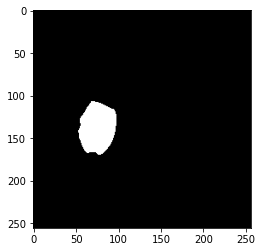

In [13]:
plt.imshow(cv2.imread(brain_df.mask_path[2021]))

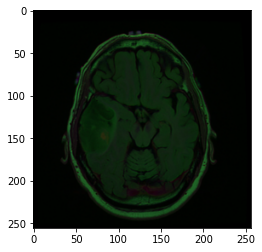

In [14]:
plt.imshow(cv2.imread(brain_df.image_path[2021]))

In [15]:
cv2.imread(brain_df.mask_path[2021]).max()

255

In [16]:
cv2.imread(brain_df.mask_path[2021]).min()

0

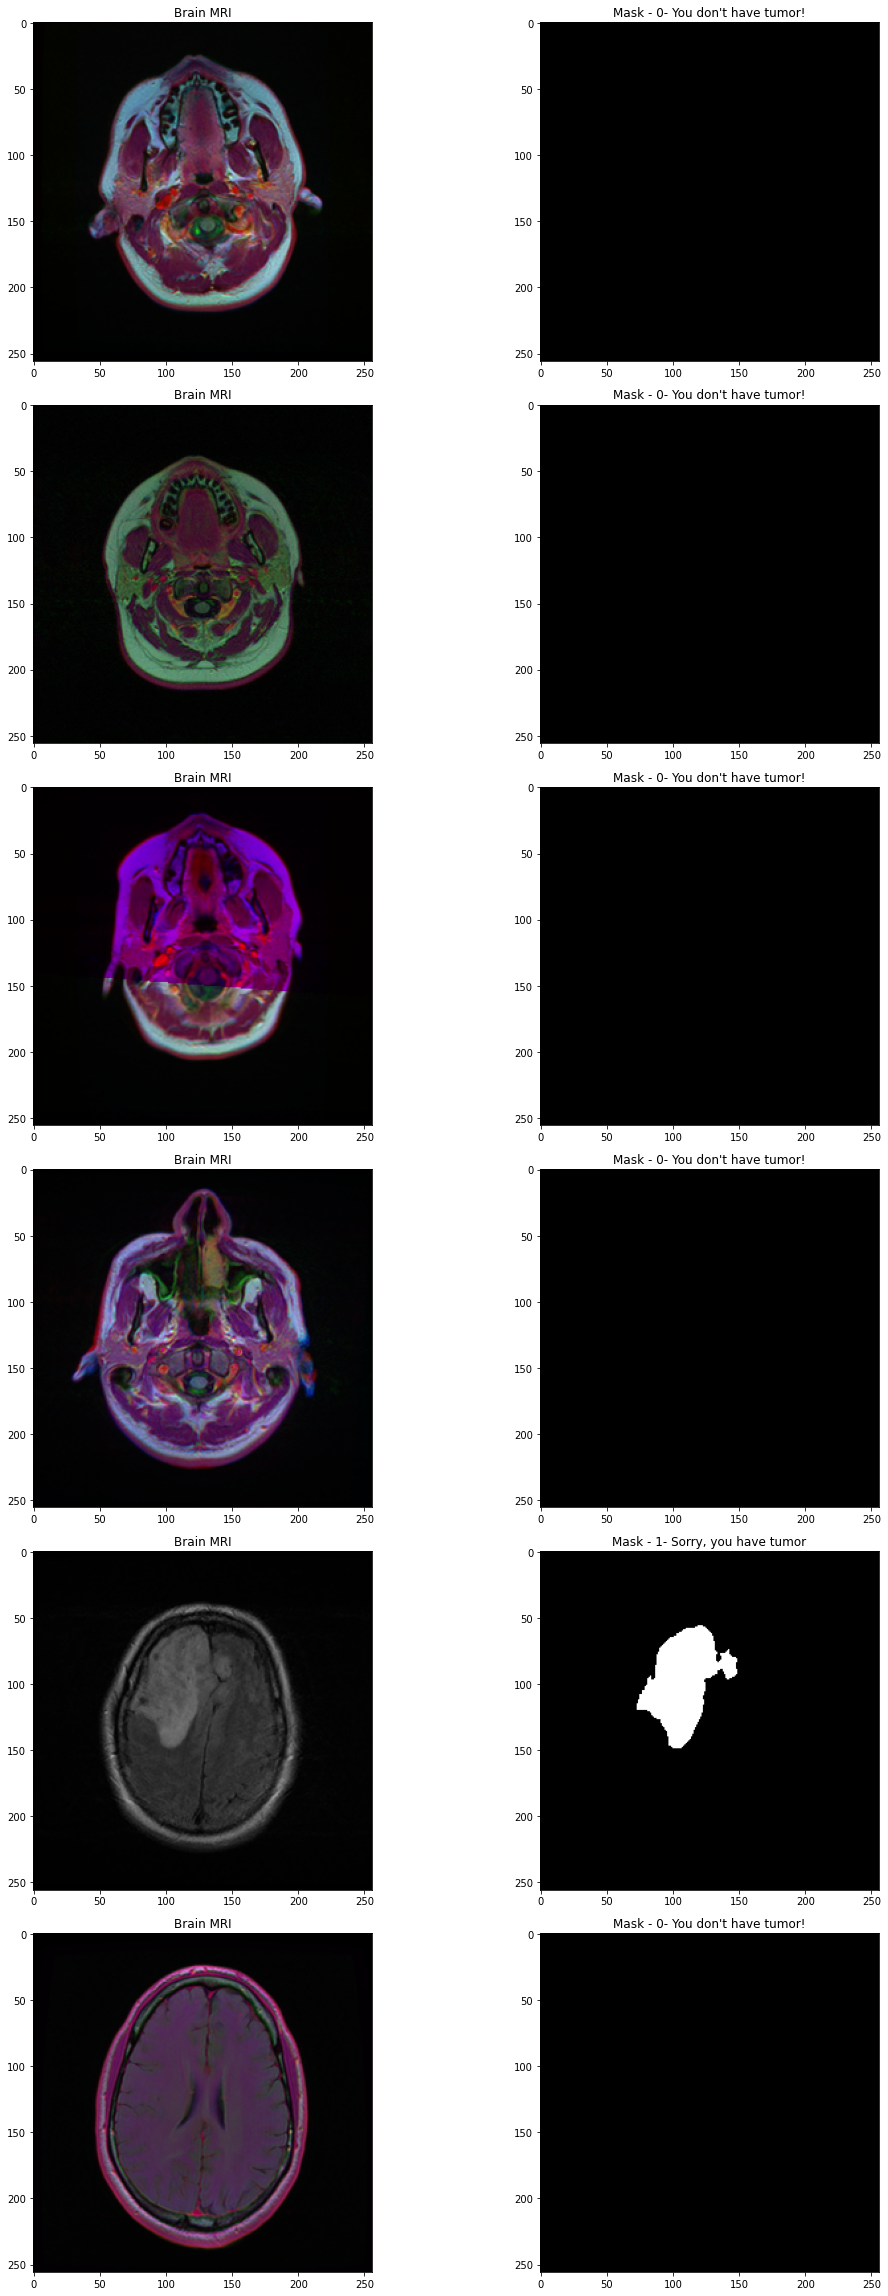

In [17]:
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) 
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i]))
  if brain_df['mask'][i]==1:
    axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i]) + "- Sorry, you have tumor")
  else:
    axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i]) + "- You don't have tumor!") 
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i]))
  count += 1

fig.tight_layout()

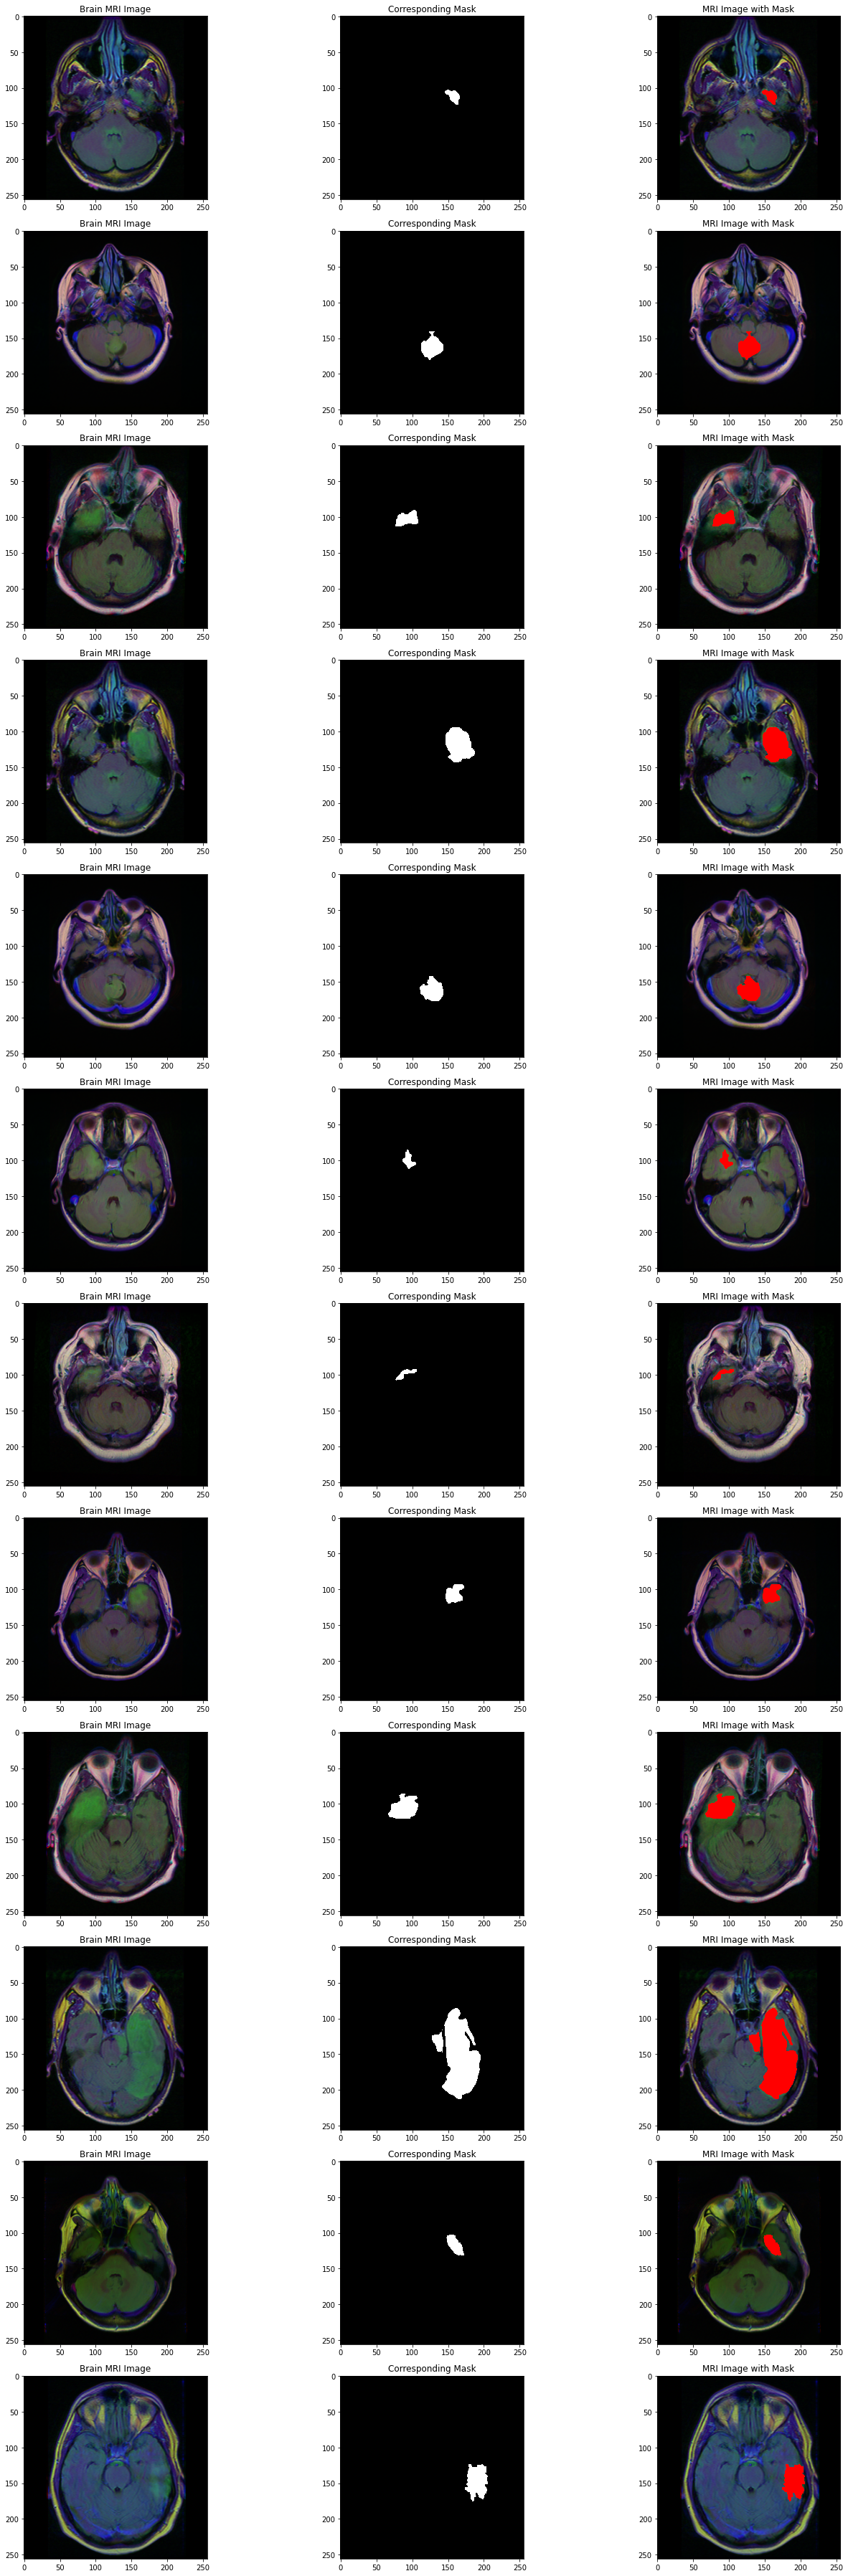

In [18]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] ==1 and count <12:
    img = io.imread(brain_df.image_path[i])
    axs[count][0].title.set_text('Brain MRI Image')
    axs[count][0].imshow(img)

    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text('Corresponding Mask')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text('MRI Image with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()


In [19]:
brain_df_t = brain_df.drop(columns = ['patient_id'])
brain_df_t.shape

(3929, 3)

In [20]:
brain_df_t['mask'] = brain_df_t['mask'].apply(lambda x: str(x)) #flow df ke liye

In [21]:
brain_df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_t, test_size = 0.15)

In [23]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)


In [24]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))



Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [25]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

In [26]:
 basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
for layer in basemodel.layers:
  layers.trainable = False

In [28]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel) #filtering and detection
headmodel = Flatten(name= 'flatten')(headmodel) #1d 
headmodel = Dense(256, activation = "relu")(headmodel) #connected to next
headmodel = Dropout(0.3)(headmodel)  #prevent overfitting
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [31]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [32]:
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

In [33]:

with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [34]:
test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 [==============================] - 72s 2s/step


In [40]:
test_predict.shape

(576, 2)

In [41]:
test_predict

array([[1.0000000e+00, 3.2683562e-13],
       [2.1630467e-04, 9.9978369e-01],
       [1.0000000e+00, 1.2392941e-12],
       ...,
       [9.9992979e-01, 7.0256348e-05],
       [2.6595578e-06, 9.9999738e-01],
       [1.1777349e-08, 1.0000000e+00]], dtype=float32)

In [42]:
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [43]:
predict

array(['0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1

In [44]:
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (256, 256, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [45]:
file1=test_generator.filenames[0]
file1

'TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_15.tif'

In [46]:
 image = load(file1)
 str(np.argmax(model.predict(image)))

'0'

In [47]:
def tumor_predict(image_loc):
    image = load(image_loc)
    return str(np.argmax(model.predict(image)))
   


In [48]:
tumor_predict(file1)

'0'

In [49]:
test_generator

In [50]:
 original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9809027777777778

<AxesSubplot:>

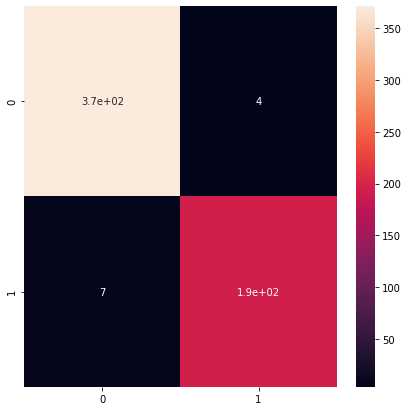

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

In [53]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.98      0.97      0.97       201

   micro avg       0.98      0.98      0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



C:\Users\Shivam\.conda\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Shivam\.conda\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Shivam\.conda\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Shivam\.conda\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [54]:
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape
brain_df_mask

patient_id  \
445   TCGA_DU_5872_19950223   
507   TCGA_DU_5874_19950510   
551   TCGA_DU_5854_19951104   
555   TCGA_DU_5854_19951104   
617   TCGA_DU_5853_19950823   
...                     ...   
3785  TCGA_HT_7684_19950816   
3795  TCGA_HT_7684_19950816   
3797  TCGA_HT_7684_19950816   
3806  TCGA_HT_7684_19950816   
3808  TCGA_HT_7684_19950816   

                                             image_path  \
445   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5.tif   
507   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5.tif   
551   TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6.tif   
555   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6.tif   
617   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6.tif   
...                                                 ...   
3785  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...   
3795  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...   
3797  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...   
3806  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...   
3808  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_58...   

                                              mask_path  mask  
445   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_...     1  
507   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5_...     1  
551   TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6_...     1  
555   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6_...     1  
617   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6_...     1  
...                                                 ...   ...  
3785  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...     1  
3795  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...     1  
3797  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...     1  
3806  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...     1  
3808  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_58...     1  

[1373 rows x 4 columns]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [56]:
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [57]:
from utilities import DataGenerator

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

In [58]:
def resblock(X, f):

  X_copy = X
    
  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [59]:
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [60]:
input_shape = (256,256,3)

X_input = Input(input_shape)

conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

conv5_in = resblock(pool_4, 256)
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )


In [61]:
model_seg.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization[0][0]        
____________________________________________________________________________________________

In [62]:
from utilities import focal_tversky, tversky_loss, tversky

In [63]:
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [64]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)

In [65]:
model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

In [66]:
from utilities import focal_tversky, tversky_loss, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [67]:
test

image_path  \
1595  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_15...   
2510  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_24...   
669   TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_7.tif   
1568  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_15...   
161   TCGA_EZ_7264_20010816/TCGA_EZ_7264_20010816_2.tif   
...                                                 ...   
1973  TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_18...   
1507  TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_14...   
1700  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_16...   
3348  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_37...   
3079  TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_32...   

                                              mask_path mask  
1595  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_15...    0  
2510  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_24...    1  
669   TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_7_...    0  
1568  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_15...    0  
161   TCGA_EZ_7264_20010816/TCGA_EZ_7264_20010816_2_...    0  
...                                                 ...  ...  
1973  TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_18...    1  
1507  TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_14...    1  
1700  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_16...    0  
3348  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_37...    0  
3079  TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_32...    1  

[590 rows x 3 columns]

In [68]:
model

In [69]:
model_seg

In [70]:
from utilities import prediction

image_id, mask, has_mask = prediction(test, model, model_seg)

In [71]:
type(mask)

list

In [72]:
model_seg

In [73]:
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

image_path  \
0    TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_15...   
1    TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_24...   
2    TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_7.tif   
3    TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_15...   
4    TCGA_EZ_7264_20010816/TCGA_EZ_7264_20010816_2.tif   
..                                                 ...   
585  TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_18...   
586  TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_14...   
587  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_16...   
588  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_37...   
589  TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_32...   

                                        predicted_mask  has_mask  
0                                              No mask         0  
1    [[[[7.911435e-07], [3.208934e-06], [7.849532e-...         1  
2                                              No mask         0  
3                                              No mask         0  
4                                              No mask         0  
..                                                 ...       ...  
585  [[[[8.1068237e-07], [3.9811375e-06], [9.466748...         1  
586  [[[[8.5682876e-07], [4.3467535e-06], [1.257548...         1  
587                                            No mask         0  
588                                            No mask         0  
589  [[[[6.963618e-07], [2.4446013e-06], [4.5081597...         1  

[590 rows x 3 columns]

In [74]:
df_pred = test.merge(df_pred, on = 'image_path')
df_pred['predicted_mask']

0                                                No mask
1      [[[[7.911435e-07], [3.208934e-06], [7.849532e-...
2                                                No mask
3                                                No mask
4                                                No mask
                             ...                        
585    [[[[8.1068237e-07], [3.9811375e-06], [9.466748...
586    [[[[8.5682876e-07], [4.3467535e-06], [1.257548...
587                                              No mask
588                                              No mask
589    [[[[6.963618e-07], [2.4446013e-06], [4.5081597...
Name: predicted_mask, Length: 590, dtype: object

In [75]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = numpy.fromstring ( fig.canvas.tostring_argb(), dtype=numpy.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = numpy.roll ( buf, 3, axis = 2 )
    return buf

In [76]:
def fig2img ( fig ):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape
    return Image.fromstring( "RGBA", ( w ,h ), buf.tostring( ) )

In [77]:
df_pred.accuracy()

AttributeError: 'DataFrame' object has no attribute 'accuracy'

In [78]:
def tumor_seg(image_path):
    
    fig, axs = plt.subplots(1,1, figsize=(30, 50))
    seg_test=pd.DataFrame({'image_path':[image_path]})
    #test1
    #print(seg_test)
    image_id, mask, has_mask = prediction(seg_test, model, model_seg)
    df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
    df_pred = seg_test.merge(df_pred, on = 'image_path')
    #print(df_pred)
    print(df_pred['image_path'][0])
    predicted_mask = np.asarray(df_pred.predicted_mask[0])[0].squeeze().round()
    img_ = io.imread(df_pred.image_path[0])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (100,149,237)
    #axs.set_facecolor("black")
    #plt.figure(facecolor="black")
    axs.imshow(img_)
    #im = fig2img (plt)
    #im.show()
    r1=random.randint(1,20000)
    r2=random.randint(3,30200)
    
    imgname=str(r2)+"try"+str(r1)+".png"
    plt.savefig(imgname)
    plt.title("PLT CHECK")
    #cv2.imshow("image",img_)
    #plt.show(img_)
    
    return imgname
    
    


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Shivam\\Desktop\\Machine Learning\\sem6project\\Data\\Healthcare AI Datasets\\Brain_MRI\\TCGA_HT_7856_19950831_15.tif'

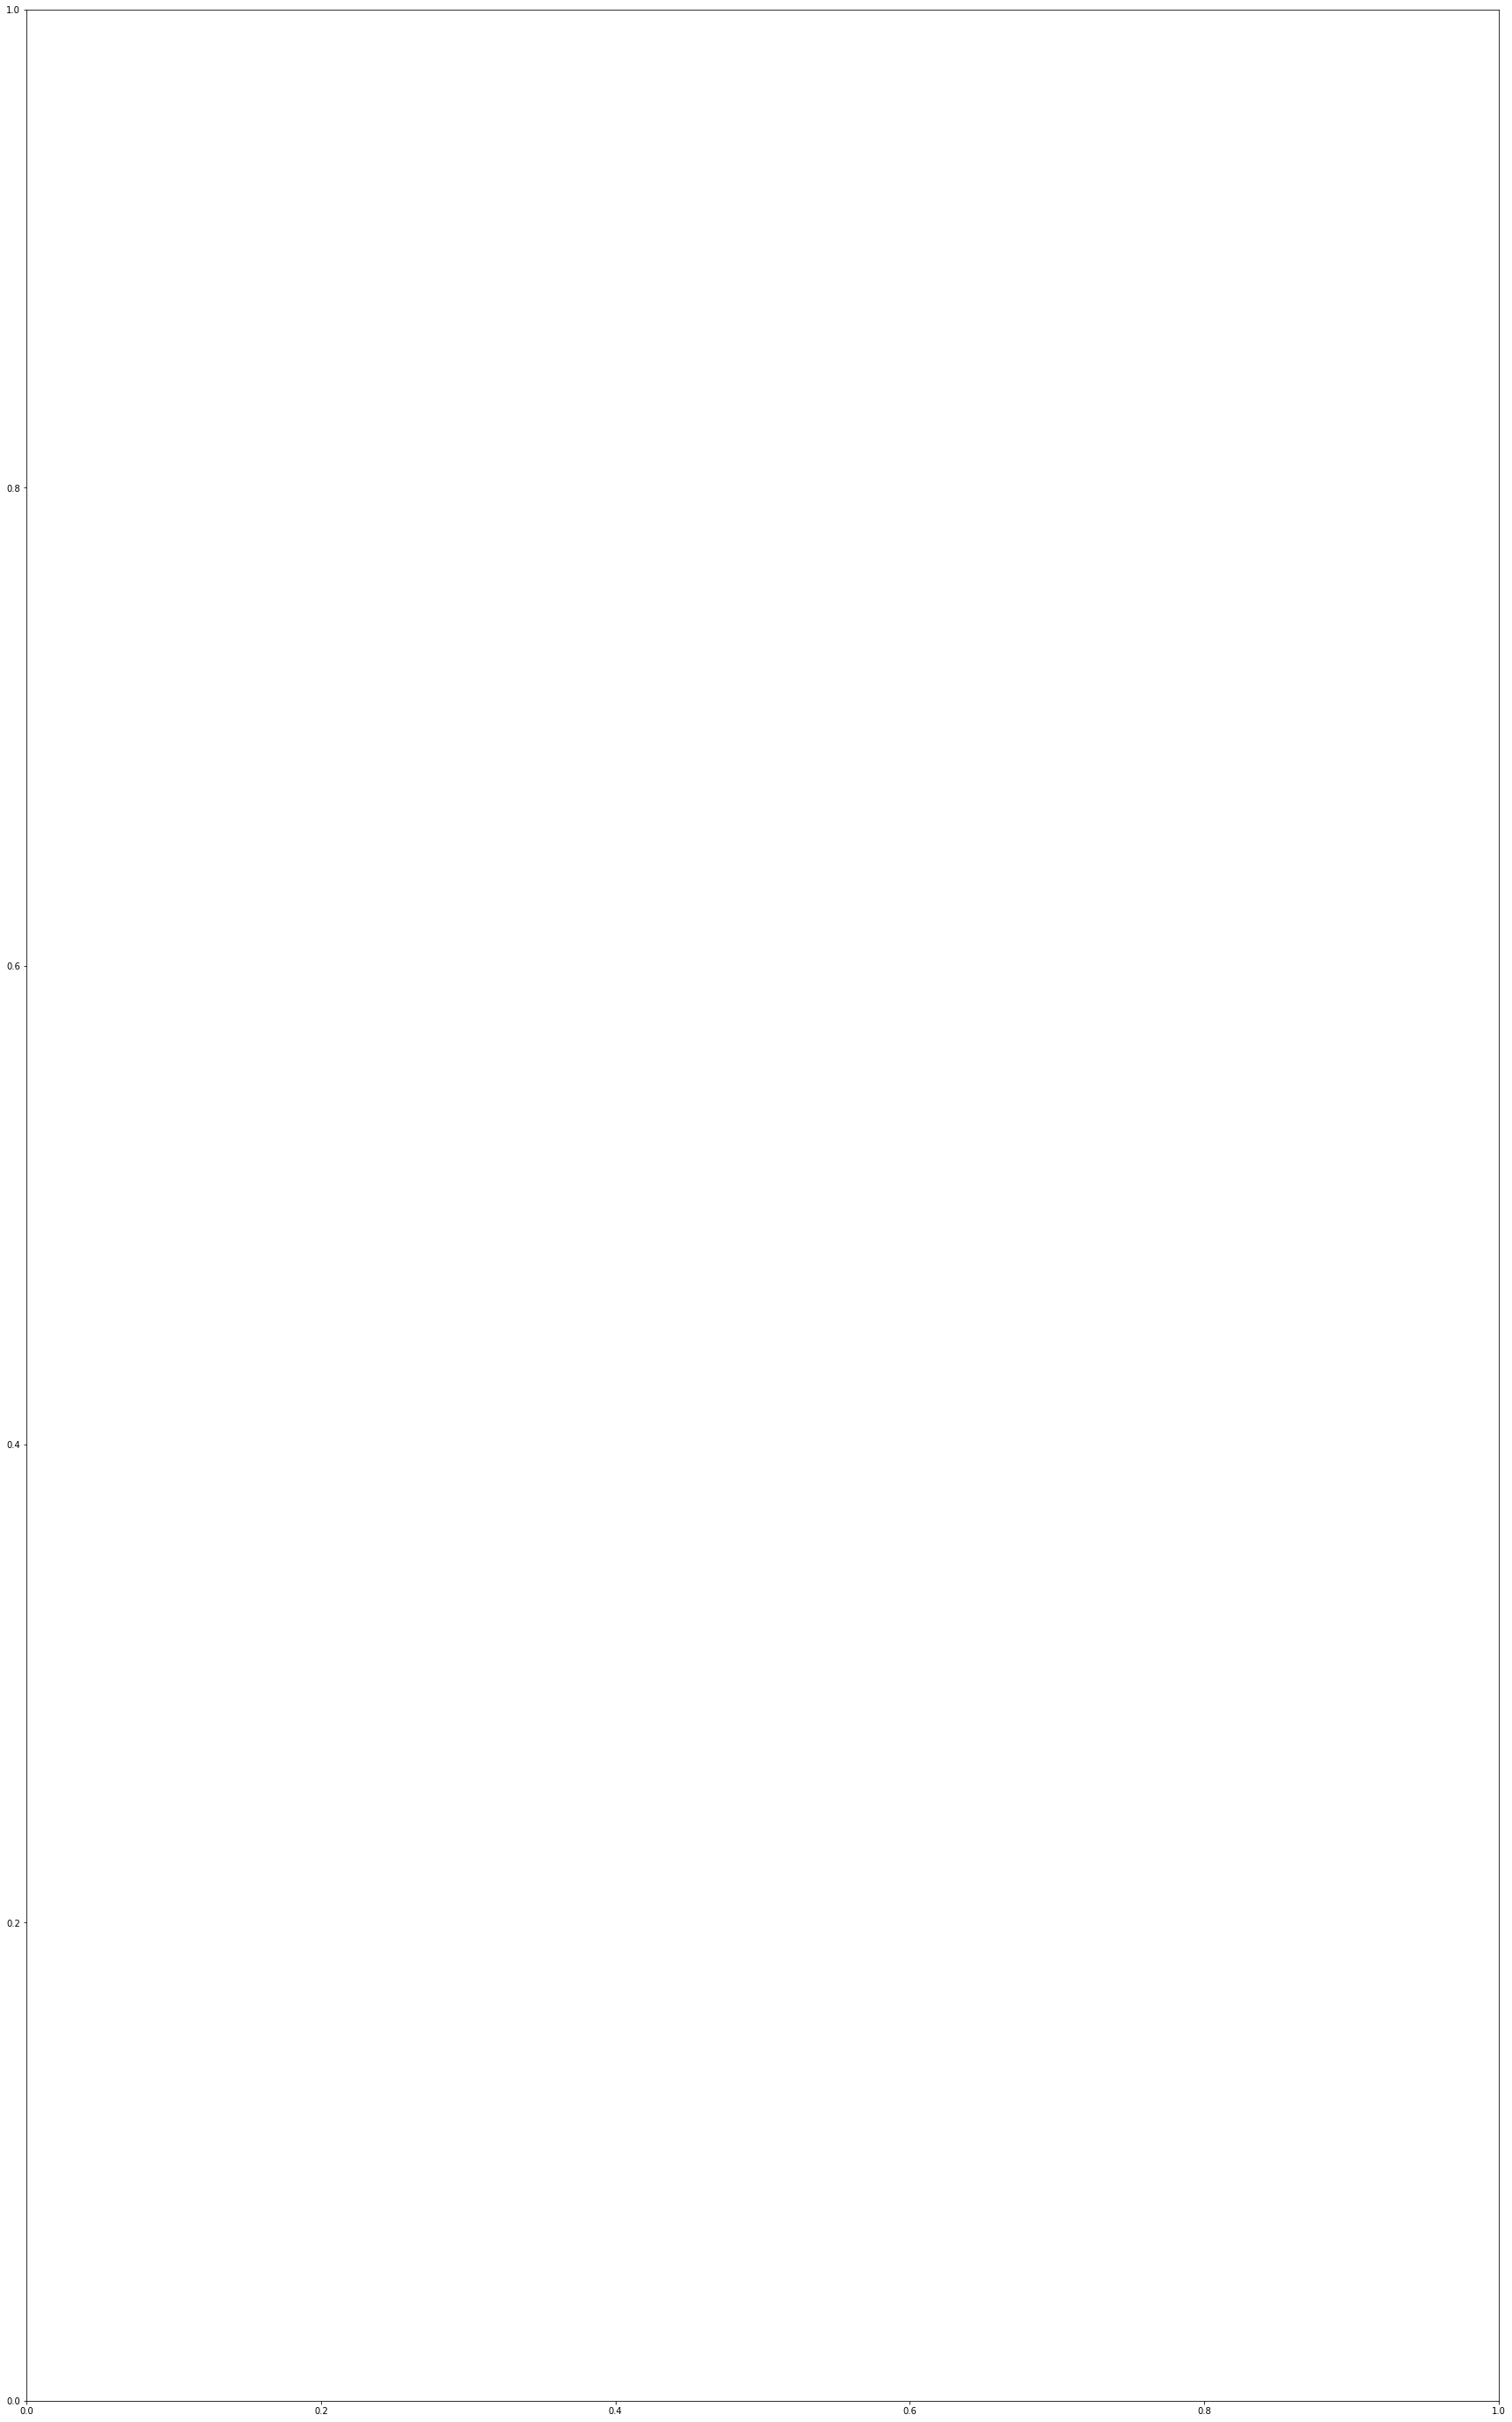

In [79]:
img_name=tumor_seg("TCGA_HT_7856_19950831_15.tif")
print(img_name)

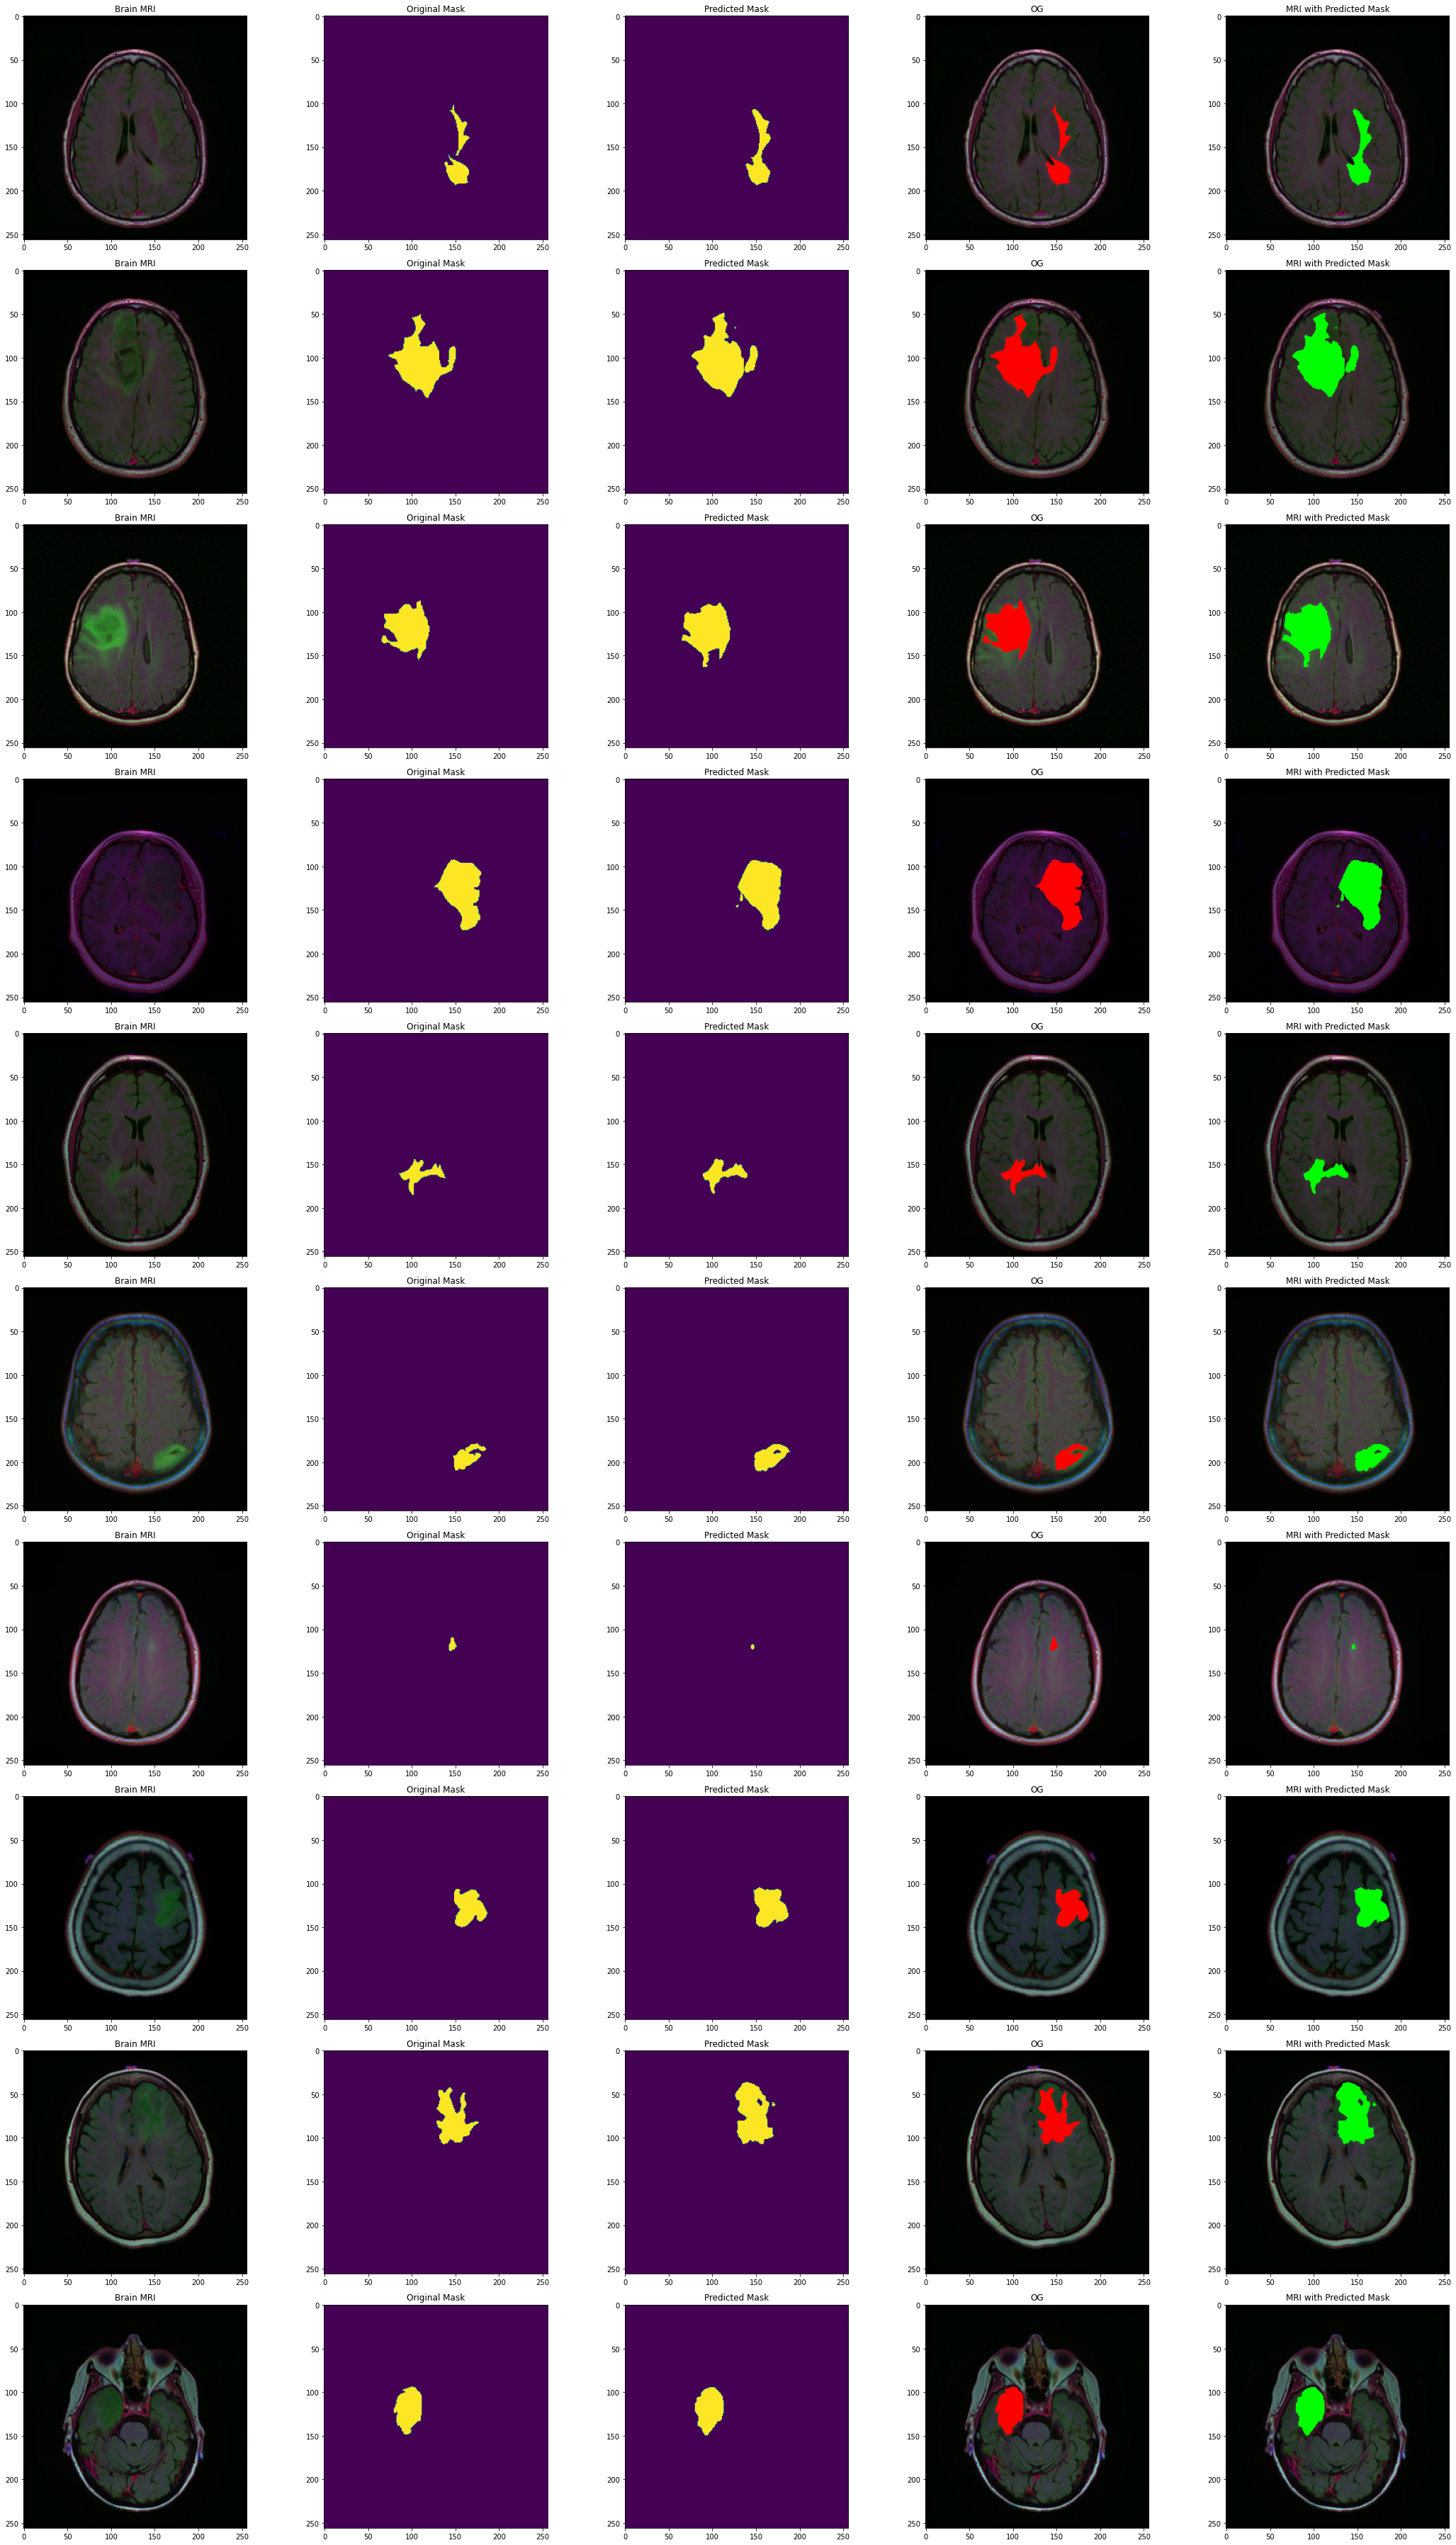

In [80]:
count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
    if df_pred['has_mask'][i] == 1 and count < 10:
    
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)

        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].title.set_text("Original Mask")
        axs[count][1].imshow(mask)

        predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
        #print(predicted_mask[i],i)
        axs[count][2].title.set_text("Predicted Mask")
        axs[count][2].imshow(predicted_mask)
    
        img[mask == 255] = (255, 0, 0)
        axs[count][3].title.set_text("OG")
        axs[count][3].imshow(img)

        img_ = io.imread(df_pred.image_path[i])
        img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_[predicted_mask == 1] = (0, 255, 0)
        axs[count][4].title.set_text("MRI with Predicted Mask")
        axs[count][4].imshow(img_)
        count += 1

fig.tight_layout()

In [75]:
df_pred.mask_path[585]

'TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_3_mask.tif'

In [81]:
from PIL import Image, ImageTk

In [82]:
lab_flag=True

In [83]:
global reset_var
reset_var=False

In [84]:
def reset_f():
    
    reset_var=True
    if notum:
        pred_1.destroy()
        reset.destroy()
        
    else:
        panel.destroy()
        pred_1.destroy()
        reset.destroy()
        

In [85]:
def detection():
    global panel,pred_1,reset,notum,tum
    notum=tum=False
    infiles = filedialog.askopenfilename(multiple=True)
    print(infiles)
    text1=tumor_predict(infiles[0])
    if text1=='0':
        notum=True
        pred_1=Label(btds,text='Congratulations!\nNo tumor found!',font=("Helvetica",30,'bold'),fg='cornflowerblue',bg='gray95')
        pred_1.pack(pady=20)
        reset=Button(btds,text='Reset',font=('Helvetica',15,'bold'),fg='black',bg='cornflowerblue',command=reset_f)
        reset.pack(pady=3)
        
    else:
        tum=True
        pred_1=Label(btds,text='Sorry..a tumor exists in the brain.\nLocation of the tumor:',font=("Helvetica",30,'bold'),fg='cornflowerblue',bg='gray95')
        pred_1.pack()
        reset=Button(btds,text='Reset',font=('Helvetica',15,'bold'),fg='black',bg='cornflowerblue',command=reset_f)
        reset.pack(pady=3)
        
        file_r=infiles[0].replace('/','\\')
        print(file_r)
        list_file=file_r.split('\\')
        print(list_file)
        list_file_1=[]
        list_file_1.append(list_file[-2])
        list_file_1.append(list_file[-1])
        print(list_file_1)
        file_fin="//".join(list_file_1)
        print(file_fin)
        name=tumor_seg(file_fin)
        print(name)
        name_1=name
        im=Image.open(name_1)
        #im.show()
        im = im.resize((500,750),Image.ANTIALIAS)      
        im = ImageTk.PhotoImage(im)
        panel = Label(btds, image = im)
        panel.image = im
        panel.pack(pady=5)
        
        
        
    
        
    
    

In [86]:
def logout():
    
    
    if notum:
        
        pred_1.destroy()
        reset.destroy()
        wel_lab.destroy()
        upload_button.destroy()
        
    elif tum:
        panel.destroy()
        pred_1.destroy()
        reset.destroy()  
        wel_lab.destroy()
        upload_button.destroy()
    else:
        wel_lab.destroy()
        upload_button.destroy()
    
    title=Label(btds,text='Brain Check Portal',font=("Helvetica",30,'bold'),fg='cornflowerblue',bg='gray95')
    title.pack(pady=20)
    login_button=Button(btds,text='Log in',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=loadm)
    login_button.pack(pady=40)
    reg_button=Button(btds,text='Register',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=newm)
    reg_button.pack(pady=5)
    #upload_button=Button(btds,text='Upload MRI Scan here',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=detection)
    #upload_button.pack(pady=30)
    info_label=Label(btds,text='\n\nThe Brain Check Portal helps the user detect the existence of tumor in the given Brain MRI Scan.\n\nIf a tumor exists,\nthe portal will also find where the tumor is located on the brain and mask it on the given MRI.\n\nThis Portal is helpful for medical authorities to reduce the time and resources usually required for the given task.',font=('Helvetica',15,'italic'),fg='cornflowerblue',bg='gray95')
    info_label.pack(pady=40)


In [87]:
def loadm():     
    #manual sign up
    
    windowsi=Toplevel()
    windowsi.resizable(0,0) 
    windowsi.geometry("500x500+550+200")
    windowsi.title("Login")
    windowsi.configure(background="gray95")
    
    #logim=PhotoImage(file="man1.png")
    
    def load1():
        #global n1,n2,n2,n3,n4,sb 
        username = False
        password = False
        #connection to sql server
        curs = pymysql.connect(host='localhost',port=3306,user='root',passwd='',db='btds')
        mycursor=curs.cursor()
        count=0
        #checking if username and codeword exists or not
        mycursor.execute("SELECT * FROM userdata")
        myresult = mycursor.fetchall()
        for x in range(0,len(myresult)):
            if(myresult[x][1]==text.get()):
                username=True
            if(myresult[x][2]==text1.get()):
                password=True
                    

        if(len(text.get())==0):             #username empty
            messagebox.showinfo('Error!!','USERNAME is empty!')
            
        

        

        elif(username and password):            #successful
            #global n1,n2,n2,n3,n4,sb 
            messagebox.showinfo('SUCCESS',"LOGIN SUCCESSFUL")
            wel_text='Welcome, '+text.get()
                                
            
            windowsi.destroy()
            login_button.destroy()
            reg_button.destroy()
            info_label.destroy()
            create_label.destroy()
            wel_lab=Label(btds,text=wel_text,font=('Helvetica',25,'italic'),fg='cornflowerblue',bg='gray95')
            wel_lab.pack(pady=3)
            #logout_button=Button(btds,text='Logout?',font=('Helvetica',10),fg='black',bg='cornflowerblue',command=logout)
            #logout_button.pack(padx=5)
            upload_button=Button(btds,text='Upload MRI Scan here',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=detection)
            upload_button.pack(pady=30)
           
            
           

        elif(len(text1.get())==0):              #password empty
            messagebox.showinfo('Error!!','PASSWORD is empty')

        

        
            

        
        else:                           #unsuccesful log in
            messagebox.showinfo('Error!!','Sorry! No such username or password!')
            text.delete('0',END)
            text1.delete('0',END)
         
    '''lstart3=Label(windowsi,image=logim)
    lstart3.image=logim
    lstart3.pack(side=TOP)'''
    #gui for user
    l6=Label(windowsi,font=("Ariel",15,"bold",),text="ENTER CREDENTIALS TO LOGIN!",fg="black",bg="gray95",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    l6.pack()
    l1=Label(windowsi,text="USERNAME: ",font=("Ariel",15,"bold"),bg="gray95",fg="black",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    l1.pack(pady=3)
    text=Entry(windowsi,width=15,font=("Ariel",15,"bold"),highlightbackground="black",highlightcolor="black",highlightthickness="2")
    text.pack(pady=3)
    l2=Label(windowsi,font=("Ariel",15,"bold",),text="PASSWORD: ",bg="gray95",fg="black")
    l2.pack(pady=3)
    text1=Entry(windowsi,width=15,font=("Ariel",15,"bold"),fg="black",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    text1.pack(pady=3)
    
    b1=Button(windowsi,width=10,font=("Ariel",15,"bold"),text="LOGIN",bg="cornflowerblue",fg="black",activebackground="SeaGreen2",command=load1)
    b1.pack(pady=9)
    

In [88]:
def newm():     #signing up manually
    #global n1,n2,n2,n3,n4,sb 
    global wel_lab,upload_button
    windowsj=Toplevel()
    windowsj.geometry("500x500+550+200")
    windowsj.resizable(0,0) 
    windowsj.title("New account")
    windowsj.config(bg="gray95")
    #newim=PhotoImage(file="man3.png")
    def new1():
        user= False
        pwd = False
        curs = pymysql.connect(host='localhost',port=3306,user='root',passwd='',db='btds')
        mycursor=curs.cursor()
          
            
        mycursor.execute("SELECT * FROM userdata")    #fetching data to check existence
        myresult = mycursor.fetchall()
        for x in range(0,len(myresult)):
            if(myresult[x][1]==text2.get()):
                user=True
            if(myresult[x][2]==text3.get()):
                pwd=True
                        

        if(len(text2.get())==0):                    #name entry widget entry
            messagebox.showinfo('Error!!','NAME is empty!')
            
            

            
        elif(user):                         #username already taken
            messagebox.showinfo('Error!!','Sorry! This username is already in use')
            text2.delete('0',END)

        elif(len(text3.get())==0):                          #password textbox empty
            messagebox.showinfo('Error!!','Password is empty')
            

            
            

        elif(len(text3.get())<4 or len(text3.get())>16):            #password validation
                
            messagebox.showinfo('Error!!','Password lenght should be >4 and <16')
            text3.delete('0',END)

        else:
            global n1,n2,n2,n3,n4,sb 
            messagebox.showinfo('SUCCESS!!','LETS START')
            leveln=1
            sql="INSERT INTO userdata (username, password) VALUES (%s,%s)"   #insertion of new data in database
            val=(text2.get(),text3.get())
            mycursor.execute(sql, val)
            
            curs.commit()
                 
            wel_text='Welcome, '+text2.get()
            text3.delete(0,END)
            text2.delete(0,END)
            
            windowsj.destroy()   
            #maing()
            
                                
            
            #windowsi.destroy()
            login_button.destroy()
            reg_button.destroy()
            info_label.destroy()
            create_label.destroy()
            
            wel_lab=Label(btds,text=wel_text,font=('Helvetica',25,'italic'),fg='cornflowerblue',bg='gray95')
            wel_lab.pack(pady=3)
            #logout_button=Button(btds,text='Logout?',font=('Helvetica',10),fg='black',bg='cornflowerblue',command=logout)
            #logout_button.pack(padx=5)
            upload_button=Button(btds,text='Upload MRI Scan here',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=detection)
            upload_button.pack(pady=30)
    
    '''lstart4=Label(windowsj,image=newim)
    lstart4.image=newim
    lstart4.pack(side=TOP)'''
    l5=Label(windowsj,font=("Ariel",15,"bold"),text="ENTER CREDENTIALS FOR NEW Accont!",fg="black",bg="gray95",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    l5.pack(pady=3)
    ln1=Label(windowsj,text="USERNAME: ",font=("Ariel",15,"bold"),bg="gray95",fg="black",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    ln1.pack(pady=3)
    text2=Entry(windowsj,width=15,font=("Ariel",15,"bold"),highlightbackground="black",highlightcolor="black",highlightthickness="2")
    text2.pack(pady=3)
    lp2=Label(windowsj,font=("Ariel",15,"bold",),text="PASSWORD: ",bg="gray95",fg="black")
    lp2.pack(pady=3)
    text3=Entry(windowsj,width=15,font=("Ariel",15,"bold"),fg="black",highlightbackground="black",highlightcolor="black",highlightthickness="2")
    text3.pack(pady=3)
    b2=Button(windowsj,width=20,font=("Ariel",15,"bold"),text="START NEW SESSION",bg="cornflowerblue",fg="black",activebackground="SeaGreen2",command=new1)
    b2.pack(pady=20)
    

('C:/Users/Shivam/Desktop/Machine Learning/sem6project/Data/Healthcare AI Datasets/Brain_MRI/TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_5.tif',)
('C:/Users/Shivam/Desktop/Machine Learning/sem6project/Data/Healthcare AI Datasets/Brain_MRI/TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_19.tif',)
C:\Users\Shivam\Desktop\Machine Learning\sem6project\Data\Healthcare AI Datasets\Brain_MRI\TCGA_CS_6186_20000601\TCGA_CS_6186_20000601_19.tif
['C:', 'Users', 'Shivam', 'Desktop', 'Machine Learning', 'sem6project', 'Data', 'Healthcare AI Datasets', 'Brain_MRI', 'TCGA_CS_6186_20000601', 'TCGA_CS_6186_20000601_19.tif']
['TCGA_CS_6186_20000601', 'TCGA_CS_6186_20000601_19.tif']
TCGA_CS_6186_20000601//TCGA_CS_6186_20000601_19.tif
TCGA_CS_6186_20000601//TCGA_CS_6186_20000601_19.tif
8947try16108.png


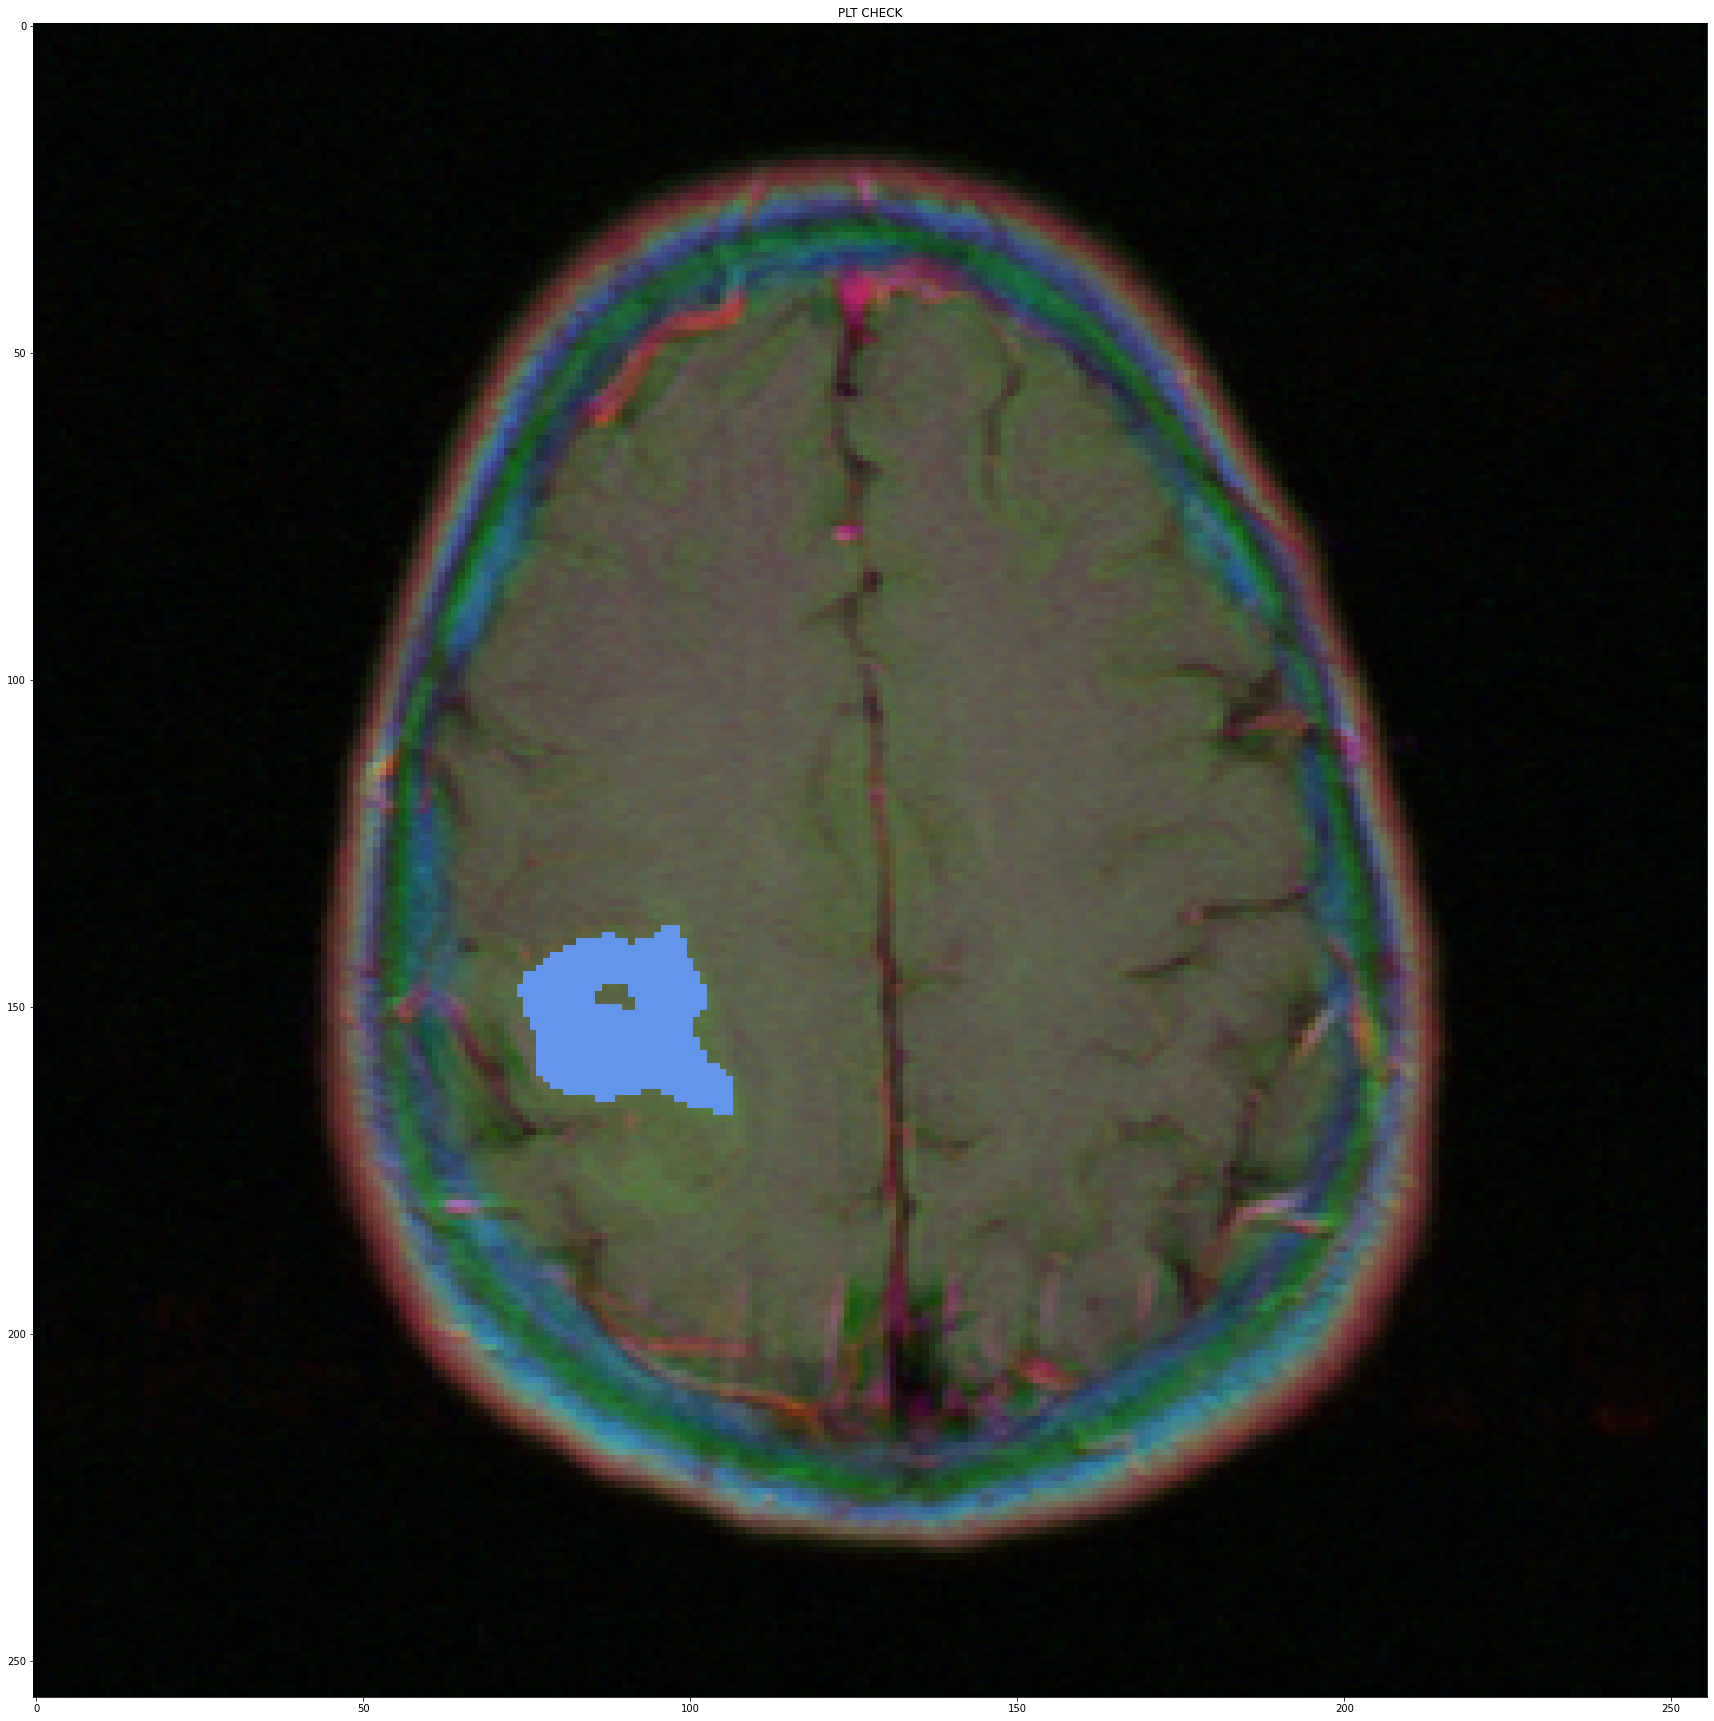

In [89]:
btds=Tk()
#creating object of tkinter

btds.configure(background="gray95")
btds.title('Brain Tumor Detection and Segmentation')
btds.geometry("1000x800+460+50")
btds.resizable(0,0)
p1=PhotoImage(file='logo.png')
btds.iconphoto(False, p1)

title=Label(btds,text='Brain Check Portal',font=("Helvetica",30,'bold','underline'),fg='cornflowerblue',bg='gray95')
title.pack(pady=30)
login_button=Button(btds,text='Log in',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=loadm)
login_button.pack(pady=40)
reg_button=Button(btds,text='Register',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=newm)
reg_button.pack(pady=5)
#upload_button=Button(btds,text='Upload MRI Scan here',font=('Helvetica',20),fg='black',bg='cornflowerblue',command=detection)
#upload_button.pack(pady=30)
info_label=Label(btds,text='\n\nThe Brain Check Portal helps the user detect the existence of tumor in the given Brain MRI Scan.\n\nIf a tumor exists,\nthe portal will also find where the tumor is located on the brain and mask it on the given MRI.\n\nThis Portal is helpful for medical authorities to reduce the time and resources usually required for the given task.',font=('Helvetica',15,'italic'),fg='cornflowerblue',bg='gray95')
info_label.pack(pady=40)
create_label=Label(btds,text='Created by A Dilna Satheeshan and Shivam Bhasin',font=('Helvetica',10,'bold','italic'),fg='dodgerblue',bg='gray95')
create_label.pack(pady=20)

mainloop()

In [81]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [90]:
import anvil.server

anvil.server.connect("LHL77T4AEKHJHP5EMZZ3XE4B-Q45R2VROWKFP57NT")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [92]:
import anvil.media

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as filename:
        img=load_img(filename)
        img=load(img)
        score=tumor_predict(img)
        print("in")
        return('Congratulations, no tumor detected!' if score == '0' else 'Sorry, a tumor has been predicted.')